In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [32]:
data=pd.read_csv("/home/rohan/Documents/ml models/4-Knn_Classifier/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
x=data.iloc[:,2:4].values

In [34]:
x.shape

(400, 2)

In [35]:
y=data.iloc[:,-1].values

In [36]:
y.shape

(400,)

In [37]:
import sklearn

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)


In [39]:
x_test.shape

(80, 2)

In [40]:
x_train.shape

(320, 2)

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_train


array([[-1.20644698,  0.57372553],
       [ 0.10350999,  0.01685273],
       [-1.11287863,  0.28063458],
       [-0.92574192,  0.54441644],
       [-0.73860521, -1.62445658],
       [-1.01931027,  1.95125299],
       [ 0.85205684,  1.01336196],
       [-0.27076343,  0.13408911],
       [-1.30001534, -0.45209279],
       [-0.36433178,  0.04616182],
       [-0.08362672,  2.15641666],
       [ 0.2906467 ,  0.04616182],
       [-1.86142547, -0.54002007],
       [-1.39358369, -0.21762003],
       [-0.27076343,  0.1927073 ],
       [-0.17719507, -0.21762003],
       [ 1.60060368,  1.74608933],
       [-0.17719507, -0.30554731],
       [ 1.50703532,  0.98405286],
       [-1.39358369, -1.47791111],
       [ 0.19707835,  0.13408911],
       [-1.48715205, -0.21762003],
       [ 0.38421506,  0.13408911],
       [-0.27076343, -1.27274745],
       [-0.73860521,  1.335762  ],
       [-0.08362672,  0.28063458],
       [-1.86142547,  0.45648915],
       [ 0.75848848,  0.25132549],
       [-0.17719507,

In [42]:
x_test=sc.transform(x_test)

In [43]:
x_test

array([[-0.08362672,  0.10478001],
       [ 0.10350999, -0.27623822],
       [-0.08362672, -0.24692912],
       [-1.67428876,  0.33925277],
       [-0.36433178, -0.80380193],
       [ 0.2906467 , -0.56932917],
       [ 0.2906467 ,  0.48579825],
       [ 1.1327619 , -0.77449283],
       [-0.55146849, -1.5365293 ],
       [ 0.38421506, -0.18831093],
       [-1.30001534,  0.39787096],
       [ 0.2906467 ,  0.04616182],
       [-0.27076343, -0.77449283],
       [-1.67428876, -1.38998383],
       [ 0.10350999,  0.1927073 ],
       [ 0.94562519,  1.86332571],
       [ 0.75848848, -1.12620197],
       [ 1.60060368, -0.92103831],
       [ 1.03919355,  0.51510734],
       [ 1.03919355, -1.00896559],
       [-0.27076343,  2.24434394],
       [-0.73860521, -1.5658384 ],
       [ 0.94562519, -1.03827469],
       [ 0.66492013, -1.41929292],
       [-0.27076343, -0.15900184],
       [ 0.19707835, -0.3934746 ],
       [ 0.75848848,  0.10478001],
       [-0.55146849,  1.36507109],
       [-0.08362672,

In [44]:
## cal value of k 
## 1.method

np.sqrt(x_train.shape[0])

17.88854381999832

In [45]:
k=17


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [47]:
##train model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [48]:
y_pred=knn.predict(x_test)

In [49]:
y_pred.shape

(80,)

In [50]:
y_test.shape

(80,)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm


array([[48,  8],
       [ 4, 20]])

In [52]:
accuracy_score(y_test,y_pred)

0.85

In [53]:
## 2nd methos on the basis of trail and error we cal k

In [55]:
acuracy=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acuracy.append(accuracy_score(y_test,y_pred))
acuracy


[0.8125,
 0.85,
 0.8125,
 0.8375,
 0.8375,
 0.85,
 0.85,
 0.85,
 0.8375,
 0.85,
 0.85,
 0.85,
 0.85,
 0.8375,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.8625,
 0.85,
 0.8625,
 0.85]

In [56]:
len(acuracy)

25

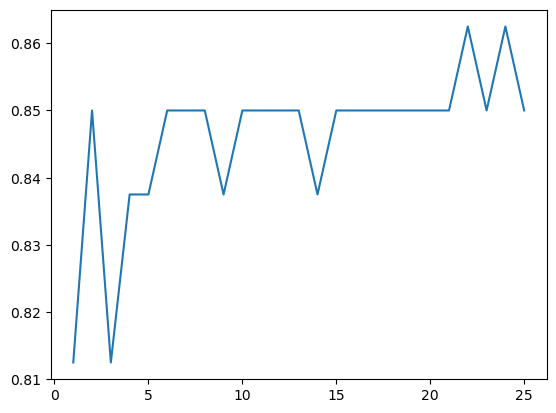

In [57]:
plt.plot(range(1,26),acuracy)

In [60]:
knn=KNeighborsClassifier(n_neighbors=22)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cm
accuracy_score


<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [ ]:
def predict_output():
    age=int(input("Enter age: "))
    salary=int(input("Enter salary: "))

    x_new=np.array([[age,salary]]).reshape(1,2)
    x_new=sc.transform(x_new)
    if knn.predict(x_new)[0]==0:
        print("Not Purchased")
    else:
        print("Purchased")
    

In [ ]:
predict_output ()

Not Purchased
